<a href="https://colab.research.google.com/github/BoHye0202/Kaggle/blob/main/Fruit_Image_Classification(Vgg16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Load

In [2]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"choibohye","key":"b82e31a50310da16da34248c963dfa0b"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes        158           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes        290           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        878            True  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       5328           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      42505            True  
house-prices-advanced-regression-techniques    2030-01-01 00:00:00  Getting Started  Knowledge      11110            True  
connectx

In [5]:
!kaggle datasets download -d moltean/fruits

 97% 739M/760M [00:16<00:00, 28.2MB/s]
100% 760M/760M [00:16<00:00, 48.9MB/s]


In [6]:
!unzip fruits.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: fruits-360/Training/Tomato 3/111_100.jpg  
  inflating: fruits-360/Training/Tomato 3/112_100.jpg  
  inflating: fruits-360/Training/Tomato 3/113_100.jpg  
  inflating: fruits-360/Training/Tomato 3/114_100.jpg  
  inflating: fruits-360/Training/Tomato 3/115_100.jpg  
  inflating: fruits-360/Training/Tomato 3/116_100.jpg  
  inflating: fruits-360/Training/Tomato 3/117_100.jpg  
  inflating: fruits-360/Training/Tomato 3/119_100.jpg  
  inflating: fruits-360/Training/Tomato 3/120_100.jpg  
  inflating: fruits-360/Training/Tomato 3/121_100.jpg  
  inflating: fruits-360/Training/Tomato 3/122_100.jpg  
  inflating: fruits-360/Training/Tomato 3/123_100.jpg  
  inflating: fruits-360/Training/Tomato 3/124_100.jpg  
  inflating: fruits-360/Training/Tomato 3/125_100.jpg  
  inflating: fruits-360/Training/Tomato 3/126_100.jpg  
  inflating: fruits-360/Training/Tomato 3/127_100.jpg  
  inflating: fruits-360/Training/Tomato 3/128_100.jpg  
  inflating:

# 데이터 정리

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
from PIL import Image

In [2]:
train_url = '/content/fruits-360/Training'
test_url = '/content/fruits-360/Test'

apple = ['Apple Red 1', 'Apple Red 2', 'Apple Red 3']
tomato = ['Tomato 1', 'Tomato 2','Tomato 3','Tomato 4']

def change(url, name, k):
  i = 1
  os.makedirs(url+name)
  for folder_name in k:
    folder = os.listdir(url+'/'+folder_name)
    print(folder_name, len(folder))
    for file in folder:
      now = os.path.join(url+'/'+folder_name+'/', file)
      new = str(i) +'.jpg'
      new = os.path.join(url+'/'+folder_name+'/', new)
      os.rename(now, new)
      i += 1
      shutil.copy(new, url+name+'/')

change(train_url, '/Apple', apple)
change(test_url, '/Apple', apple)

change(train_url, '/Tomato', tomato)
change(test_url, '/Tomato', tomato)

FileExistsError: ignored

# 데이터 전처리

In [3]:
classes= ['Apple', 'Avocado', 'Banana', 'Blueberry', 'Lemon', 'Mango', 'Orange', 'Peach', 'Pineapple', 'Potato Sweet', 'Strawberry', 'Tomato']

def label(name):
  l = {'Apple':0, 'Avocado':1, 'Banana':2, 'Blueberry':3, 'Lemon':4, 'Mango':5, 'Orange':6, 'Peach':7, 'Pineapple':8, 'Potato Sweet':9, 'Strawberry':10, 'Tomato':11}
  return l[name]

In [9]:
# y_test = []

# idx = 1
# os.makedirs('/content/fruits-360/Test/Test')

# for i in classes:
#   url = test_url+'/'+i

#   y_test.append([label(i) for _ in range(len(os.listdir(url)))])
#   print(i, len(os.listdir(url)))

#   for file in os.listdir(url):
#     now = os.path.join(url+'/', file)
#     new = str(idx) + '.jpg'
#     new = os.path.join(url+'/', new)
#     os.rename(now, new)
#     idx += 1
#     shutil.copy(new, '/content/fruits-360/Test/Test/')
#   print(i, len(os.listdir('/content/fruits-360/Test/Test')),'\n')

Apple 472
Apple 472 

Avocado 143
Avocado 615 

Banana 166
Banana 781 

Blueberry 154
Blueberry 935 

Lemon 164
Lemon 1099 

Mango 166
Mango 1265 

Orange 160
Orange 1425 

Peach 164
Peach 1589 

Pineapple 166
Pineapple 1755 

Potato Sweet 150
Potato Sweet 1905 

Strawberry 164
Strawberry 2069 

Tomato 877
Tomato 2946 



In [10]:
# y_test = sum(y_test,[])
# print(len(y_test))
# print(len(os.listdir('/content/fruits-360/Test/Test')))

2946
2946


In [4]:
X_train = []
y_train = []

img_size = 100
for i in classes:
  url = train_url +'/' + i
  k = len(os.listdir(url))
  y_train.append([label(i) for _ in range(k)])
  print('Number of y_train data: ', i, k)

  for img in os.listdir(url):
    img = url+'/'+img
    image = Image.open(img)
    data = np.asarray(image)
    data = data / 255.0 # Normalization

    X_train.append(data)

y_train = sum(y_train, [])
print('\nNumber of Training Images and Shape: ', np.shape(X_train))
print('Number of Training label: ', len(y_train))

Number of y_train data:  Apple 1413
Number of y_train data:  Avocado 427
Number of y_train data:  Banana 490
Number of y_train data:  Blueberry 462
Number of y_train data:  Lemon 492
Number of y_train data:  Mango 490
Number of y_train data:  Orange 479
Number of y_train data:  Peach 492
Number of y_train data:  Pineapple 490
Number of y_train data:  Potato Sweet 450
Number of y_train data:  Strawberry 492
Number of y_train data:  Tomato 2627

Number of Training Images and Shape:  (8804, 100, 100, 3)
Number of Training label:  8804


In [5]:
X_test = []
y_test = []

img_size = []
for i in classes:
  url = test_url + '/' + i
  k = len(os.listdir(url))
  y_test.append([label(i) for _ in range(k)])
  print('Number of y_test data: ', i, k)

  for img in os.listdir(url):
    img = url + '/' + img
    image = Image.open(img)
    data= np.asarray(image)
    data = data/255.0

    X_test.append(data)

y_test = sum(y_test, [])
print('\nNumber of Test Images and Shape: ', np.shape(X_test))
print('Number of Test label: ', len(y_test))

Number of y_test data:  Apple 236
Number of y_test data:  Avocado 143
Number of y_test data:  Banana 166
Number of y_test data:  Blueberry 154
Number of y_test data:  Lemon 164
Number of y_test data:  Mango 166
Number of y_test data:  Orange 160
Number of y_test data:  Peach 164
Number of y_test data:  Pineapple 166
Number of y_test data:  Potato Sweet 150
Number of y_test data:  Strawberry 164
Number of y_test data:  Tomato 877

Number of Test Images and Shape:  (2710, 100, 100, 3)
Number of Test label:  2710


# Model

In [6]:
from sklearn.model_selection import  train_test_split
import tensorflow as tf

X_train = np.array(X_train)
# y_train = np.array(y_train)
X_test = np.array(X_test)
# y_test = np.array(y_test)
# X_train = X_train.reshape(-1, img_size, img_size, 3)


y_train=tf.keras.utils.to_categorical(y_train,num_classes=12)
y_test=tf.keras.utils.to_categorical(y_test,num_classes=12)

x_train,x_val,y_train,y_val=train_test_split(X_train, y_train, test_size=0.2,random_state=42)
print(x_train.shape, x_val.shape, y_train.shape, y_val.shape)

(7043, 100, 100, 3) (1761, 100, 100, 3) (7043, 12) (1761, 12)


In [7]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical
from keras.models import Sequential, Model, Input
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ReduceLROnPlateau
from IPython.display import SVG
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

In [14]:
# Vgg16모델의 filter는 64-128-256-512-512-4096(dense) 크기였으나 수정하여 진행

epochs=30
batch_size=32

model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12,activation="softmax"))

#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 100, 100, 64)      1792      
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 100, 100, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 50, 50, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 25, 25, 128)      

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [15]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model, to_file='model.png',show_shapes=True)

AssertionError: ignored

In [16]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
220/220 [==============================] - 18s 74ms/step - loss: 1871.0243 - accuracy: 0.2666 - val_loss: 2.2324 - val_accuracy: 0.2998
Epoch 2/30
220/220 [==============================] - 16s 70ms/step - loss: 2.2472 - accuracy: 0.2971 - val_loss: 2.2306 - val_accuracy: 0.2998
Epoch 3/30
220/220 [==============================] - 15s 70ms/step - loss: 2.2293 - accuracy: 0.3061 - val_loss: 2.2232 - val_accuracy: 0.2998
Epoch 4/30
220/220 [==============================] - 15s 70ms/step - loss: 2.2592 - accuracy: 0.2926 - val_loss: 2.2267 - val_accuracy: 0.2998
Epoch 5/30
220/220 [==============================] - 16s 70ms/step - loss: 2.2479 - accuracy: 0.2951 - val_loss: 2.2271 - val_accuracy: 0.2998
Epoch 6/30
220/220 [==============================] - 16s 70ms/step - loss: 2.2445 - accuracy: 0.2972 - val_loss: 2.2304 - val_accuracy: 0.2998
Epoch 7/30
220/220 [==============================] - 16s 70ms/step - loss: 2.2471 - accuracy: 0.3008 - val_loss: 2.2245 - val_accura

KeyboardInterrupt: ignored

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Test

In [ ]:
predict = model.predict(X_test)
model.evaluate(X_test, y_test, verbose = 1)

In [ ]:
def Name(name):
  l = {0:'Apple', 1:'Avocado', 2:'Banana', 3:'Blueberry', 4:'Lemon', 5:'Mango', 6:'Orange', 7:'Peach', 8:'Pineapple', 9:'Potato Sweet', 10:'Strawberry', 11:'Tomato'}
  return l[name]

result = []
labels = np.argmax(predict, axis=1)
for i in labels:
  result.append(Name(i))
print(len(result), set(result))

In [ ]:
sub = pd.read_csv('/content/test_answer_sample_.csv')
sub['answer value'] = result
sub.to_csv('result.csv', index=False)
sub

# ResNet50 - 전이

In [44]:
from keras.applications.resnet50 import ResNet50
from keras.applications.resnet50 import preprocess_input

# 클래스의 개수 정의
num_classes = 12

# EARLY_STOP_PATIENCE < NUM_EPOCHS
NUM_EPOCHS = 30
EARLY_STOP_PATIENCE = 3

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# Training images processed in each step would be no.-of-train-images / STEPS_PER_EPOCH_TRAINING
STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

# These steps value should be proper FACTOR of no.-of-images in train & valid folders respectively
# NOTE that these BATCH* are for Keras ImageDataGenerator batching to fill epoch step input
BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

# 테스트 배치의 개수
BATCH_SIZE_TESTING = 1

In [78]:
# 모델 제작
resnet = Sequential()
resnet.add(ResNet50(weights=resnet_weights,include_top = False, pooling = 'max')) 
resnet.add(Dense(num_classes, activation = 'softmax'))

# 이미 학습된 영역은 학습하지 않겠다고 설정하는 옵션 
resnet.layers[0].trainable = False

In [79]:
resnet.build(input_shape=(100,100,3))
resnet.summary()

ValueError: ignored

In [80]:
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)

#compile the model
resnet.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


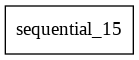

In [81]:
SVG(model_to_dot(model).create(prog='dot', format='svg'))
Utils.plot_model(model, to_file='model.png',show_shapes=True)

In [82]:
datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                           featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=True, #divide input datas to std
                           samplewise_std_normalization=True,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=True,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history_resnet = resnet.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:349: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras_preprocessing/image/image_data_generator.py:356: UserWarning: This ImageDataGenerator specifies `samplewise_std_normalization`, which overrides setting of `samplewise_center`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
220/220 [==============================] - 20s 80ms/step - loss: 2.8912 - accuracy: 0.5505 - val_loss: 11.3591 - val_accuracy: 0.0557
Epoch 2/30
220/220 [==============================] - 17s 76ms/step - loss: 0.8206 - accuracy: 0.8194 - val_loss: 13.5650 - val_accuracy: 0.0931
Epoch 3/30
 93/220 [===========>..................] - ETA: 9s - loss: 0.6823 - accuracy: 0.8543

KeyboardInterrupt: ignored

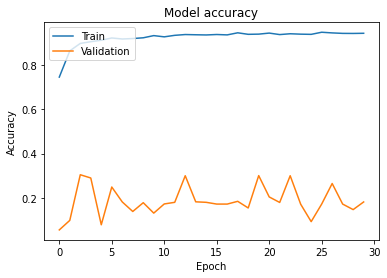

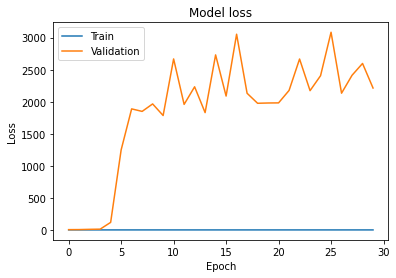

In [50]:
plt.plot(history_resnet.history['accuracy'])
plt.plot(history_resnet.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history_resnet.history['loss'])
plt.plot(history_resnet.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Kaggle

In [17]:
model=Sequential()
model.add(Conv2D(filters=8,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(100,100,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=16,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))

model.add(Conv2D(filters=32,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.35))
model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(12,activation="softmax"))
#defining optimizer
optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999)
#compile the model
model.compile(optimizer=optimizer,loss="categorical_crossentropy",metrics=["accuracy"])

epochs=30
batch_size=32

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 100, 100, 8)       224       
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 100, 100, 8)       584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 50, 50, 8)         0         
_________________________________________________________________
dropout_16 (Dropout)         (None, 50, 50, 8)         0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 50, 50, 16)        1168      
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 50, 50, 16)        2320      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 25, 25, 16)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
datagen=ImageDataGenerator(featurewise_center=False, #set input mean to 0
                           samplewise_center=False,  #set each sample mean to 0
                           featurewise_std_normalization=False, #divide input datas to std
                           samplewise_std_normalization=False,  #divide each datas to own std
                           zca_whitening=False,  #dimension reduction
                           rotation_range=0.5,    #rotate 5 degree
                           zoom_range=0.5,        #zoom in-out 5%
                           width_shift_range=0.5, #shift 5%
                           height_shift_range=0.5,
                           horizontal_flip=False,  #randomly flip images
                           vertical_flip=False,
                           )
datagen.fit(x_train)

#model fitting
history=model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),epochs=epochs,
                            validation_data=(x_val,y_val),steps_per_epoch=x_train.shape[0]//batch_size
                           )

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
220/220 [==============================] - 17s 67ms/step - loss: 2.2539 - accuracy: 0.3037 - val_loss: 1.6109 - val_accuracy: 0.4032
Epoch 2/30
220/220 [==============================] - 14s 63ms/step - loss: 1.5027 - accuracy: 0.4375 - val_loss: 1.4945 - val_accuracy: 0.4543
Epoch 3/30
220/220 [==============================] - 14s 63ms/step - loss: 1.3464 - accuracy: 0.4669 - val_loss: 1.1557 - val_accuracy: 0.5531
Epoch 4/30
220/220 [==============================] - 14s 63ms/step - loss: 1.2059 - accuracy: 0.5111 - val_loss: 1.0074 - val_accuracy: 0.5684
Epoch 5/30
220/220 [==============================] - 14s 64ms/step - loss: 1.1574 - accuracy: 0.5317 - val_loss: 1.1507 - val_accuracy: 0.5219
Epoch 6/30
220/220 [==============================] - 14s 64ms/step - loss: 1.1420 - accuracy: 0.5215 - val_loss: 1.0535 - val_accuracy: 0.5599
Epoch 7/30
220/220 [==============================] - 14s 63ms/step - loss: 1.0442 - accuracy: 0.5651 - val_loss: 1.2956 - val_accuracy:

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## Kaggle-Test

In [ ]:
predict = model.predict(X_test)
model.evaluate(X_test, y_test, verbose = 1)

In [ ]:
def Name(name):
  l = {0:'Apple', 1:'Avocado', 2:'Banana', 3:'Blueberry', 4:'Lemon', 5:'Mango', 6:'Orange', 7:'Peach', 8:'Pineapple', 9:'Potato Sweet', 10:'Strawberry', 11:'Tomato'}
  return l[name]

result = []
labels = np.argmax(predict, axis=1)
for i in labels:
  result.append(Name(i))

real= []
reals = np.argmax(y_test, axis = 1)
for r in reals:
  real.append(Name(r))

print(len(result), set(result))
print(len(real), set(real))

In [ ]:
sub = pd.read_csv('/content/test_answer_sample_.csv')
sub['answer value'] = result
sub['real'] = real
sub.to_csv('result.csv', index=False)
sub